In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd562fe63-439a-4c71-974a-4acf053e2082',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11871,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981411e+07,1.981411e+07,False,NaN,1,NaN,NaN,None,2025-01-23T16:48:00.000Z,106210.034246,8.243041e+10,33.2426,0.882011,2.550241,6.880712,8.249887,9.853813,56.813445,2.104457e+12,58.0444,2.230411e+12,None,2025-01-23T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 16:50:29.346511+00:00
1,1027,Ethereum,ETH,ethereum,9853,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205033e+08,1.205033e+08,True,NaN,2,NaN,NaN,None,2025-01-23T16:48:00.000Z,3282.233464,2.556091e+10,8.7956,0.589127,0.224667,-1.836381,-5.654100,-1.454544,29.543294,3.955199e+11,10.9091,3.955199e+11,None,2025-01-23T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 16:50:29.346511+00:00
2,52,XRP,XRP,xrp,1513,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,NaN,NaN,None,2025-01-23T16:48:00.000Z,3.159287,9.088757e+09,26.1121,0.537342,0.002861,-6.639805,36.823152,131.188825,505.287610,1.818626e+11,5.0161,3.159287e+11,None,2025-01-23T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 16:50:29.346511+00:00
3,825,Tether USDt,USDT,tether,114451,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.386083e+11,1.415769e+11,True,NaN,4,NaN,NaN,None,2025-01-23T16:48:00.000Z,1.000223,1.310331e+11,4.8690,0.024273,0.039673,0.024682,0.078957,-0.030526,0.089227,1.386392e+11,3.8239,1.416085e+11,None,2025-01-23T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-23 16:50:29.346511+00:00
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.865810e+08,5.926735e+08,True,NaN,5,NaN,NaN,None,2025-01-23T16:48:00.000Z,253.521124,9.379841e+09,12.4805,1.583013,-1.172554,18.709770,29.279574,2.029982,47.066120,1.233586e+11,3.4024,1.502553e+11,None,2025-01-23T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 16:50:29.346511+00:00
5,1839,BNB,BNB,bnb,2340,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424811e+08,1.424811e+08,False,NaN,6,NaN,NaN,None,2025-01-23T16:48:00.000Z,689.528282,2.132298e+09,19.6652,0.191165,-0.391072,-3.238938,-0.652361,5.622175,16.816528,9.824477e+10,2.7098,9.824477e+10,None,2025-01-23T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 16:50:29.346511+00:00
6,74,Dogecoin,DOGE,dogecoin,1154,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.477446e+11,1.477446e+11,True,NaN,7,NaN,NaN,None,2025-01-23T16:48:00.000Z,0.357176,2.983812e+09,-7.4795,0.961983,-0.820685,-6.955212,7.322096,-14.630162,161.749729,5.277082e+10,1.4555,5.277082e+10,None,2025-01-23T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 16:50:29.346511+00:00
7,3408,USDC,USDC,usd-coin,25115,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.166948e+10,5.166948e+10,False,NaN,8,NaN,NaN,None,2025-01-23T16:48:00.000Z,1.000029,1.899867e+10,62.4997,-0.008118,0.010743,-0.014396,-0.008602,0.002884,0.021957,5.167100e+10,1.4252,5.167100e+10,None,2025-01-23T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-23 16:50:29.346511+00:00
8,2010,Cardano,ADA,cardano,1452,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, re

In [4]:
import os
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Initialize global df as an empty DataFrame
df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'd562fe63-439a-4c71-974a-4acf053e2082',  # Replace with your valid key
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        response.raise_for_status()  # Raise an error for bad status codes
        data = response.json()  # Parse JSON directly
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Request error: {e}")
        return
    except Exception as e:
        print(f"Unexpected error: {e}")
        return

    # Normalize and append the data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now', utc=True)

    # Initialize df if empty, otherwise append
    if df.empty:
        df = df2
    else:
        df = pd.concat([df, df2], ignore_index=True)

    # File path
    file_path = r'C:\Users\Akhilesh\OneDrive\Documents\Akhilesh\Data Analysis\Python\Automating_Crypto_Website\API.csv'

    # Ensure directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Write to CSV
    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False)
    else:
        df.to_csv(file_path, mode='a', header=False, index=False)

    # Read back the file to verify
    df = pd.read_csv(file_path)
    print(df.head())  # Print the first few rows to verify

# Run the function
api_runner()


     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11871   
1  1027     Ethereum    ETH  ethereum              9847   
2    52          XRP    XRP       xrp              1513   
3   825  Tether USDt   USDT    tether            114343   
4  5426       Solana    SOL    solana               832   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2013-08-04T00:00:00.000Z   
3  2015-02-25T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags    max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2  ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
3  ['stablecoin', 'asset-backed-stablecoin', 'eth...           NaN   
4  ['pos', 'platform', 'solana-ecosystem', 'cms-h...           NaN   

   circulating_supply  total_supply  

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11871,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981399e+07,1.981399e+07,False,NaN,1,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,101646.979801,6.110028e+10,-16.1794,-0.532130,-3.170366,2.529931,8.141148,3.670121,49.956366,2.014032e+12,57.4677,2.134587e+12,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
1,1027,Ethereum,ETH,ethereum,9847,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205033e+08,1.205033e+08,True,NaN,2,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,3194.469823,2.150093e+10,-21.5550,-0.504369,-3.180582,-4.142710,-5.932423,-6.217060,25.906187,3.849441e+11,10.9870,3.849441e+11,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
2,52,XRP,XRP,xrp,1513,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,NaN,NaN,NaN,2025-01-23T09:56:00.000Z,3.086494,8.523816e+09,9.9210,-0.441951,-2.596954,0.569687,37.945837,113.776212,487.032811,1.776723e+11,5.0625,3.086494e+11,NaN,2025-01-23T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
3,825,Tether USDt,USDT,tether,114343,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.386083e+11,1.415769e+11,True,NaN,4,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,0.999364,1.097993e+11,-24.6286,-0.010686,-0.037119,-0.037759,0.074158,-0.174290,0.033736,1.385202e+11,3.9536,1.414869e+11,NaN,2025-01-23T09:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-23 09:57:33.504688
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.866004e+08,5.926796e+08,True,NaN,5,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,246.673431,8.711959e+09,1.1739,0.184673,-2.734058,22.623788,28.021681,-3.111182,42.678261,1.200314e+11,3.4259,1.461983e+11,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
5,1839,BNB,BNB,bnb,2339,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424812e+08,1.424812e+08,False,NaN,6,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,683.993986,1.970128e+09,4.2650,-0.299045,-2.097476,-3.157194,-0.380902,0.909824,15.392682,9.745629e+10,2.7816,9.745629e+10,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
6,3408,USDC,USDC,usd-coin,25080,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.153288e+10,5.153288e+10,False,NaN,7,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,0.999934,1.434248e+10,10.3278,-0.010853,0.013030,0.000878,-0.009608,0.000383,0.015288,5.152946e+10,1.4707,5.152946e+10,NaN,2025-01-23T09:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-23 09:57:33.504688
7,74,Dogecoin,DOGE,dogecoin,1154,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.477406e+11,1.477406e+11,True,NaN,8,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,0.348754,2.685573e+09,-68.1517,-0.443839,-4.256602,-6.701035,9.112524,-19.298478,150.623334,5.152514e+10,1.4706,5.152514e+10,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
8,2010,Cardano,ADA,cardano,1452,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.517134e+1

In [61]:
# We need to foramt our floating points as they are in scientific notation which does not look good while plotting or visualizing them

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11871,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0000,19813987.0000,19813987.0000,False,NaN,1,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,101646.9798,61100283338.1278,-16.1794,-0.5321,-3.1704,2.5299,8.1411,3.6701,49.9564,2014031936367.8955,57.4677,2134586575822.7200,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
1,1027,Ethereum,ETH,ethereum,9847,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120503267.7840,120503267.7840,True,NaN,2,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,3194.4698,21500934170.4721,-21.5550,-0.5044,-3.1806,-4.1427,-5.9324,-6.2171,25.9062,384944052484.7734,10.9870,384944052484.7700,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
2,52,XRP,XRP,xrp,1513,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0000,57564441898.0000,99986637553.0000,False,NaN,3,NaN,NaN,NaN,2025-01-23T09:56:00.000Z,3.0865,8523816250.2489,9.9210,-0.4420,-2.5970,0.5697,37.9458,113.7762,487.0328,177672315373.2054,5.0625,308649418833.9900,NaN,2025-01-23T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
3,825,Tether USDt,USDT,tether,114343,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,138608320795.9185,141576929752.2777,True,NaN,4,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,0.9994,109799276354.4750,-24.6286,-0.0107,-0.0371,-0.0378,0.0742,-0.1743,0.0337,138520225722.0792,3.9536,141486947924.2800,NaN,2025-01-23T09:57:00.000Z,1027.0000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-23 09:57:33.504688
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,486600422.6395,592679608.7010,True,NaN,5,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,246.6734,8711959156.1762,1.1739,0.1847,-2.7341,22.6238,28.0217,-3.1112,42.6783,120031395843.0288,3.4259,146198312640.5400,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
5,1839,BNB,BNB,bnb,2339,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142481212.4000,142481212.4000,False,NaN,6,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,683.9940,1970127661.3977,4.2650,-0.2990,-2.0975,-3.1572,-0.3809,0.9098,15.3927,97456292452.6671,2.7816,97456292452.6700,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
6,3408,USDC,USDC,usd-coin,25080,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,51532883123.2726,51532883123.2726,False,NaN,7,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,0.9999,14342482548.3034,10.3278,-0.0109,0.0130,0.0009,-0.0096,0.0004,0.0153,51529459475.2470,1.4707,51529459475.2500,NaN,2025-01-23T09:57:00.000Z,1027.0000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-23 09:57:33.504688
7,74,Dogecoin,DOGE,dogecoin,1154,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147740596383.7053,147740596383.7053,True,NaN,8,NaN,NaN,NaN,2025-01-23T09:57:00.000Z,0.3488,2685573107.6382,-68.1517,-0.4438,-4.2566,-6.7010,9.1125,-19.2985,150.6233,51525137344.7085,1.4706,51525137344.7100,NaN,2025-01-23T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-23 09:57:33.504688
8,2010,Cardano,ADA,cardano,1452,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'pla

In [9]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.0880,-1.1670,4.1056,7.9559,5.9090,52.3502
Ethereum,-0.2018,-1.9932,-3.3309,-5.9671,-4.4930,27.1487
XRP,-0.0840,-1.6356,-2.1917,37.5083,120.5438,493.9804
Tether USDt,0.0064,-0.0142,-0.0002,0.0782,-0.1124,0.0567
Solana,0.5374,-2.3586,21.0523,28.4157,-1.1991,44.2545
BNB,-0.1300,-1.4666,-3.1757,-0.4602,2.7625,15.9527
USDC,0.0019,0.0091,0.0132,-0.0039,0.0121,0.0228
Dogecoin,-0.0001,-3.0026,-6.8020,8.4371,-17.4889,154.8655
Cardano,-0.2710,-2.1083,-9.4673,6.8109,-4.6378,183.3459


In [10]:
type(df3)

pandas.core.frame.DataFrame

In [62]:
# We will stack the df3 which gives the output in the form of rows of data
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.0880
             quote.USD.percent_change_24h    -1.1670
             quote.USD.percent_change_7d      4.1056
             quote.USD.percent_change_30d     7.9559
             quote.USD.percent_change_60d     5.9090
             quote.USD.percent_change_90d    52.3502
Ethereum     quote.USD.percent_change_1h     -0.2018
             quote.USD.percent_change_24h    -1.9932
             quote.USD.percent_change_7d     -3.3309
             quote.USD.percent_change_30d    -5.9671
             quote.USD.percent_change_60d    -4.4930
             quote.USD.percent_change_90d    27.1487
XRP          quote.USD.percent_change_1h     -0.0840
             quote.USD.percent_change_24h    -1.6356
             quote.USD.percent_change_7d     -2.1917
             quote.USD.percent_change_30d    37.5083
             quote.USD.percent_change_60d   120.5438
             quote.USD.percent_change_90d   493.9804
Teth

In [12]:
# Previously our df3 was a dataframe, now it is a Series
type(df4)

pandas.core.series.Series

In [13]:
# But we cannot use it as a series, so we must make it a dataframe again
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h   -0.0880
            quote.USD.percent_change_24h  -1.1670
            quote.USD.percent_change_7d    4.1056
            quote.USD.percent_change_30d   7.9559
            quote.USD.percent_change_60d   5.9090
            quote.USD.percent_change_90d  52.3502
Ethereum    quote.USD.percent_change_1h   -0.2018
            quote.USD.percent_change_24h  -1.9932
            quote.USD.percent_change_7d   -3.3309
            quote.USD.percent_change_30d  -5.9671
            quote.USD.percent_change_60d  -4.4930
            quote.USD.percent_change_90d  27.1487
XRP         quote.USD.percent_change_1h   -0.0840
            quote.USD.percent_change_24h  -1.6356
            quote.USD.percent_change_7d   -2.1917
            quote.USD.percent_change_30d  37.5083
            quote.USD.percent_change_60d 120.5438
            quote.USD.percent_change_90d 493.9804
Tether USDt quote.USD.percent_change_1h    0.0064
            quote.USD.percent_change_24h  -0.0142
            quote.USD.percent_change_7d   -0.0002
            quote.USD.percent_change_30d   0.0782
            quote.USD.percent_change_60d  -0.1124
            quote.USD.percent_change_90d   0.0567
Solana      quote.USD.percent_change_1h    0.5374
            quote.USD.percent_change_24h  -2.3586
            quote.USD.percent_change_7d   21.0523
            quote.USD.percent_change_30d  28.4157
            quote.USD.percent_change_60d  -1.1991
            quote.USD.percent_change_90d  44.2545
BNB         quote.USD.percent_change_1h   -0.1300
            quote.USD.percent_change_24h  -1.4666
            quote.USD.percent_change_7d   -3.1757
            quote.USD.percent_change_30d  -0.4602
            quote.USD.percent_change_60d   2.7625
            quote.USD.percent_change_90d  15.9527
USDC        quote.USD.percent_change_1h    0.0019
            quote.USD.percent_change_24h   0.0091
            quote.USD.percent_change_7d    0.0132
            quote.USD.percent_change_30d  -0.0039
            quote.USD.percent_change_60d   0.0121
            quote.USD.percent_change_90d   0.0228
Dogecoin    quote.USD.percent_change_1h   -0.0001
            quote.USD.percent_change_24h  -3.0026
            quote.USD.percent_change_7d   -6.8020
            quote.USD.percent_change_30d   8.4371
            quote.USD.percent_change_60d -17.4889
            quote.USD.percent_change_90d 154.8655
Cardano     quote.USD.percent_change_1h   -0.2710
            quote.USD.percent_change_24h  -2.1083
            quote.USD.percent_change_7d   -9.4673
            quote.USD.percent_change_30d   6.8109
            quote.USD.percent_change_60d  -4.6378
            quote.USD.percent_change_90d 183.3459
TRON        quote.USD.percent_change_1h    0.2227
            quote.USD.percent_change_24h  -1.5713
            quote.USD.percent_change_7d    4.8821
            quote.USD.percent_change_30d  -1.9856
            quote.USD.percent_change_60d  17.9712
            quote.USD.percent_change_90d  50.3169
Chainlink   quote.USD.percent_change_1h    0.3083
            quote.USD.percent_change_24h  -2.8958
            quote.USD.percent_change_7d   11.2217
            quote.USD.percent_change_30d   2.6582
            quote.USD.percent_change_60d  45.1343
            quote.USD.percent_change_90d 110.6148
Avalanche   quote.USD.percent_change_1h    0.0703
            quote.USD.percent_change_24h  -3.8211
            quote.USD.percent_change_7d   -9.3900
            quote.USD.percent_change_30d -10.3331
            quote.USD.percent_change_60d -13.3303
            quote.USD.percent_change_90d  34.4305
Sui         quote.USD.percent_change_1h   -0.4405
            quote.USD.percent_change_24h  -4.8273
            quote.USD.percent_change_7d   -6.5404
            quote.USD.percent_change_30d  -3.7639
            quote.USD.percent_change_60d  28.1556
            quote.USD.percent_change_90d 130.0395
Toncoin     quote.USD.percent_change_1h   -

In [14]:
type(df5)

pandas.core.frame.DataFrame

In [15]:
df5.count()

values    90
dtype: int64

In [32]:
# We must reset the index in order to get the index column
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.0880
1,Bitcoin,quote.USD.percent_change_24h,-1.1670
2,Bitcoin,quote.USD.percent_change_7d,4.1056
3,Bitcoin,quote.USD.percent_change_30d,7.9559
4,Bitcoin,quote.USD.percent_change_60d,5.9090
5,Bitcoin,quote.USD.percent_change_90d,52.3502
6,Ethereum,quote.USD.percent_change_1h,-0.2018
7,Ethereum,quote.USD.percent_change_24h,-1.9932
8,Ethereum,quote.USD.percent_change_7d,-3.3309
9,Ethereum,quote.USD.percent_change_30d,-5.9671


In [33]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.0880
1,Bitcoin,quote.USD.percent_change_24h,-1.1670
2,Bitcoin,quote.USD.percent_change_7d,4.1056
3,Bitcoin,quote.USD.percent_change_30d,7.9559
4,Bitcoin,quote.USD.percent_change_60d,5.9090
5,Bitcoin,quote.USD.percent_change_90d,52.3502
6,Ethereum,quote.USD.percent_change_1h,-0.2018
7,Ethereum,quote.USD.percent_change_24h,-1.9932
8,Ethereum,quote.USD.percent_change_7d,-3.3309
9,Ethereum,quote.USD.percent_change_30d,-5.9671


In [41]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.0880
1,Bitcoin,24h,-1.1670
2,Bitcoin,7d,4.1056
3,Bitcoin,30d,7.9559
4,Bitcoin,60d,5.9090
5,Bitcoin,90d,52.3502
6,Ethereum,1h,-0.2018
7,Ethereum,24h,-1.9932
8,Ethereum,7d,-3.3309
9,Ethereum,30d,-5.9671


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

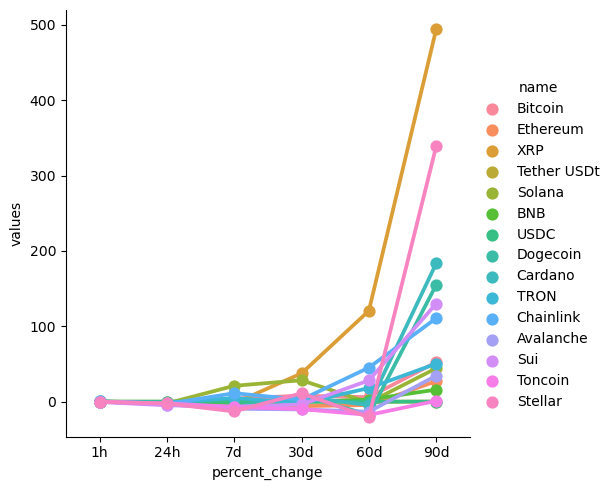

In [47]:
g= sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point');
plt.show()

In [59]:
# We can also query for seaparate elements and visualize them
df8 = df[['name', 'quote.USD.price', 'Timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8 = df8.head()
df8

,name,quote.USD.price,Timestamp
0,Bitcoin,101646.9798,2025-01-23 09:57:33.504688
15,Bitcoin,101646.9798,2025-01-23 09:57:33.504688
30,Bitcoin,101646.9798,2025-01-23 09:59:24.199430
45,Bitcoin,105884.1306,2025-01-23 16:51:09.998667+00:00
60,Bitcoin,101646.9798,2025-01-23 09:57:33.504688


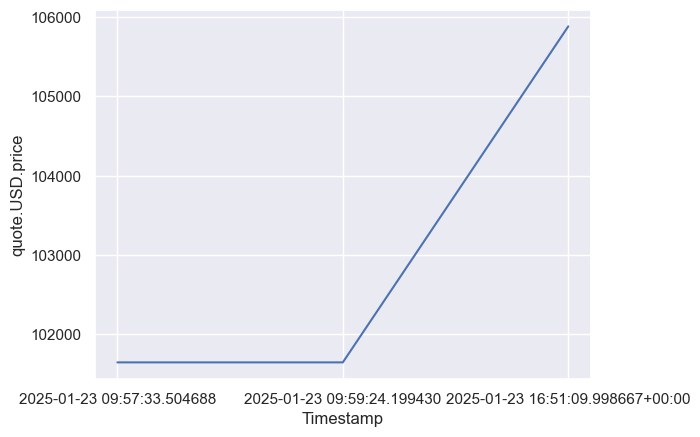

In [60]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'Timestamp', y = 'quote.USD.price', data = df8)
plt.show()